<center><h1>APPLYING CNN FOR PROJECT APPLICATION</h1></center>

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

In [13]:
# resize with data generator
train_datagen_with_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen_with_no_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

In [14]:
train_generator = train_datagen_with_no_transforms.flow_from_directory("C:\\Users\\charan\\Desktop\\DATASETS\\train",
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
train_generator_with_data_augmentation = train_datagen_with_transforms.flow_from_directory("C:\\Users\\charan\\Desktop\\DATASETS\\train",
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
validation_generator = val_datagen.flow_from_directory("C:\\Users\\charan\\Desktop\\DATASETS\\train",
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [15]:
sample_data = next(validation_generator)

In [16]:
sample_data[0].shape

(15, 32, 32, 3)

In [17]:
nb_train_samples = train_generator.samples
nb_val_samples = validation_generator.samples

In [18]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [33]:
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/15)

<ipython-input-33-042d1bd7e198>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15,


Epoch 1/30
1/1 [==============================] - 0s 273ms/step - loss: 0.2743 - accuracy: 0.9333 - val_loss: 0.2824 - val_accuracy: 0.9333
Epoch 2/30
1/1 [==============================] - 0s 189ms/step - loss: 0.3680 - accuracy: 0.9333 - val_loss: 0.2473 - val_accuracy: 0.9333
Epoch 3/30
1/1 [==============================] - 0s 188ms/step - loss: 0.2464 - accuracy: 1.0000 - val_loss: 0.2206 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 199ms/step - loss: 0.4124 - accuracy: 0.8000 - val_loss: 0.2528 - val_accuracy: 0.8667
Epoch 5/30
1/1 [==============================] - 0s 191ms/step - loss: 0.3780 - accuracy: 0.8000 - val_loss: 0.2876 - val_accuracy: 0.8667
Epoch 6/30
1/1 [==============================] - 0s 189ms/step - loss: 0.3671 - accuracy: 0.8000 - val_loss: 0.2486 - val_accuracy: 0.9333
Epoch 7/30
1/1 [==============================] - 0s 183ms/step - loss: 0.3259 - accuracy: 0.8667 - val_loss: 0.2435 - val_accuracy: 0.8000
Epoch 8/30
1/1 [====

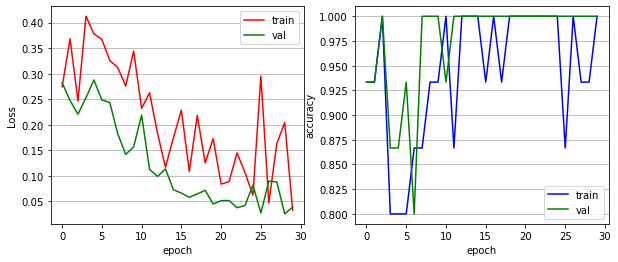

In [34]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")

# A2 : CNN with two layers + data augmentation

In [35]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [36]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [37]:
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [38]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [39]:
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/15)

<ipython-input-39-042d1bd7e198>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15,


Epoch 1/30
1/1 [==============================] - 1s 686ms/step - loss: 2.3002 - accuracy: 0.2000 - val_loss: 1.5454 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 187ms/step - loss: 1.5522 - accuracy: 0.3333 - val_loss: 1.2258 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 186ms/step - loss: 1.2318 - accuracy: 0.3333 - val_loss: 1.0739 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 186ms/step - loss: 1.1141 - accuracy: 0.4667 - val_loss: 1.0537 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 0s 193ms/step - loss: 1.0847 - accuracy: 0.3333 - val_loss: 0.9289 - val_accuracy: 0.7333
Epoch 6/30
1/1 [==============================] - 0s 221ms/step - loss: 0.9393 - accuracy: 0.6667 - val_loss: 0.9504 - val_accuracy: 0.4667
Epoch 7/30
1/1 [==============================] - 0s 204ms/step - loss: 0.9895 - accuracy: 0.4667 - val_loss: 0.8707 - val_accuracy: 0.6667
Epoch 8/30
1/1 [====

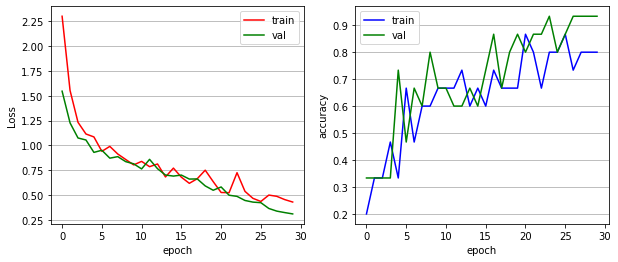

In [40]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_data_augmentation")

# B1 : CNN with maxpooling layers

In [41]:
# Add Maxpooling and Dropout Layers
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [43]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])
#history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model2.fit_generator(train_generator, steps_per_epoch=nb_train_samples/15, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/15)

<ipython-input-43-569f62107b7f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(train_generator, steps_per_epoch=nb_train_samples/15,


Epoch 1/30
1/1 [==============================] - 1s 736ms/step - loss: 2.2434 - accuracy: 0.2000 - val_loss: 1.8184 - val_accuracy: 0.4667
Epoch 2/30
1/1 [==============================] - 0s 173ms/step - loss: 1.8369 - accuracy: 0.3333 - val_loss: 1.4751 - val_accuracy: 0.2667
Epoch 3/30
1/1 [==============================] - 0s 181ms/step - loss: 1.5278 - accuracy: 0.2667 - val_loss: 1.2338 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 177ms/step - loss: 1.2904 - accuracy: 0.4667 - val_loss: 1.0332 - val_accuracy: 0.4667
Epoch 5/30
1/1 [==============================] - 0s 174ms/step - loss: 1.0154 - accuracy: 0.5333 - val_loss: 0.9932 - val_accuracy: 0.4000
Epoch 6/30
1/1 [==============================] - 0s 229ms/step - loss: 0.9844 - accuracy: 0.6000 - val_loss: 0.8790 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 0s 197ms/step - loss: 0.9303 - accuracy: 0.6000 - val_loss: 0.8650 - val_accuracy: 0.5333
Epoch 8/30
1/1 [====

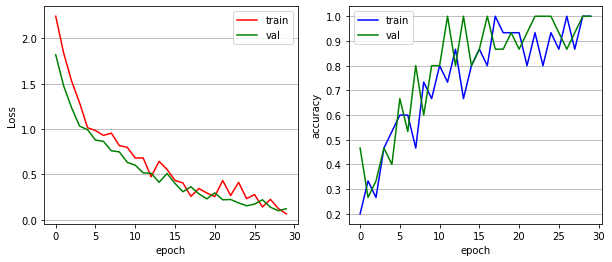

In [44]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_dropout_maxpool")

# B2 : CNN with maxpooling + data augmentation

In [45]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])
#history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model2.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/15)

<ipython-input-45-3d6fa0f05268>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/15,


Epoch 1/30
1/1 [==============================] - 1s 906ms/step - loss: 2.3155 - accuracy: 0.1333 - val_loss: 1.8625 - val_accuracy: 0.4000
Epoch 2/30
1/1 [==============================] - 0s 186ms/step - loss: 1.9515 - accuracy: 0.3333 - val_loss: 1.4937 - val_accuracy: 0.4000
Epoch 3/30
1/1 [==============================] - 0s 187ms/step - loss: 1.4761 - accuracy: 0.4000 - val_loss: 1.2291 - val_accuracy: 0.4667
Epoch 4/30
1/1 [==============================] - 0s 189ms/step - loss: 1.3018 - accuracy: 0.2667 - val_loss: 1.1030 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 0s 178ms/step - loss: 1.1148 - accuracy: 0.4000 - val_loss: 1.0543 - val_accuracy: 0.4000
Epoch 6/30
1/1 [==============================] - 0s 172ms/step - loss: 1.0843 - accuracy: 0.4000 - val_loss: 0.9911 - val_accuracy: 0.4667
Epoch 7/30
1/1 [==============================] - 0s 180ms/step - loss: 1.1176 - accuracy: 0.3333 - val_loss: 0.9621 - val_accuracy: 0.4667
Epoch 8/30
1/1 [====

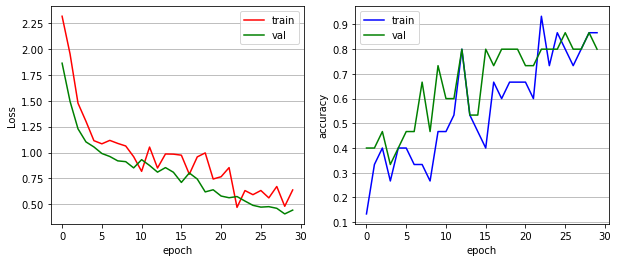

In [46]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_maxpool_dropout_augmentation")

<center><h1>APPLYING LSTM</h1></center>

In [2]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('C:\\Users\\charan\\Desktop\\DATASETS\\train.csv')
data_test = pd.read_csv('C:\\Users\\charan\\Desktop\\DATASETS\\test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM, Bidirectional, Conv1D, concatenate, Permute, Dropout

batch_size = 32
num_classes = 10
epochs = 2

row_hidden = 128
col_hidden = 128

row, col = X_train.shape[1:]

input = Input(shape=(row, col))

def lstm_pipe(in_layer):
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(x)
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences = True))(x)
    return LSTM(col_hidden)(encoded_rows)
# read it by rows
first_read = lstm_pipe(input)
# read it by columns
trans_read = lstm_pipe(Permute(dims = (1,2))(input))
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(input, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 permute (Permute)              (None, 28, 28)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 28, 128)      10880       ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 28, 128)      10880       ['permute[0][0]']                
                                                                                              

In [4]:
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/2
1500/1500 [==============================] - 226s 133ms/step - loss: 0.5594 - accuracy: 0.7943 - val_loss: 0.4102 - val_accuracy: 0.8441
Epoch 2/2
1500/1500 [==============================] - 199s 132ms/step - loss: 0.3944 - accuracy: 0.8543 - val_loss: 0.4014 - val_accuracy: 0.8497


In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3629457354545593
Test accuracy: 0.8634999990463257
